In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv('diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0


In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


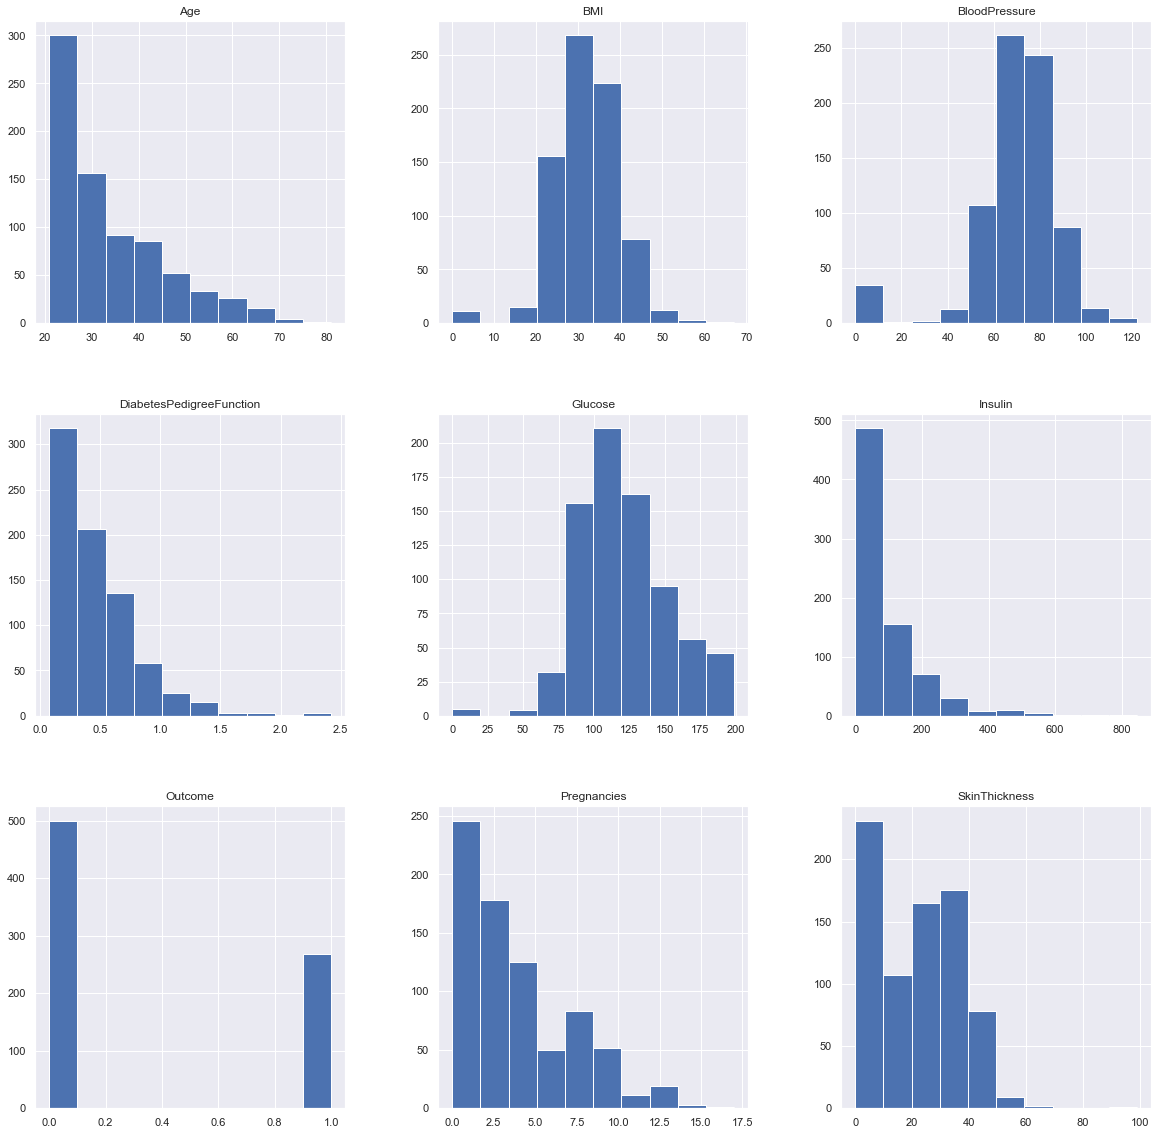

In [5]:
p = diabetes_data.hist(figsize = (20,20))

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# data
df=pd.read_csv("diabetes.csv")

In [8]:
# data
x=df.drop("Outcome",axis=1).values

In [9]:
# outcome data
y=df['Outcome'].values

In [10]:
#แบ่งชุดข้อมูล #test_size คือส่วนของข้อมูลที่เอามา test เป็น %
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.082) 

In [11]:
print(len(x_train), len(x_test))

705 63


In [12]:
df.head(63)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,89,66,23,94,28.1,0.167,21,0
1,1,73,50,10,0,23.0,0.248,21,0
2,2,84,0,0,0,0.0,0.304,21,0
3,1,80,55,0,0,19.1,0.258,21,0
4,2,142,82,18,64,24.7,0.761,21,0
...,...,...,...,...,...,...,...,...,...
58,1,99,58,10,0,25.4,0.551,21,0
59,0,134,58,20,291,26.4,0.352,21,0
60,1,114,66,36,200,38.1,0.289,21,0
61,0,126,86,27,120,27.4,0.515,21,0


In [13]:
#เราจะสร้าง model โดยใช้ KNN โดยเราต้องระบุหาค่า K หรือจำหน่วยจุดใกล้เคียง 
#เพื่อคำนวนหาความแม่นยำของตัว model ว่าเราควรจะเลือกใช้ตัว K ที่สามารถบอกความแม่นยำของ model

# find k to model
k_neighbors=np.arange(1,9)

In [14]:
#empty
train_score = np.empty(len(k_neighbors))
test_score = np.empty(len(k_neighbors))

In [15]:
#ซึ่งวิธีหาคือทำการ train ค่าข้อมูลของเราไปที่ model โดยเราจะทดสอบค่า k ทุกค่า
for i,k in enumerate(k_neighbors):
    #1-8
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    #วัดประสิทธิภาพ
    train_score[i]=knn.score(x_train,y_train)
    test_score[i]=knn.score(x_test,y_test)
    print(test_score[i]*100)

66.66666666666666
68.25396825396825
66.66666666666666
69.84126984126983
69.84126984126983
74.60317460317461
69.84126984126983
71.42857142857143


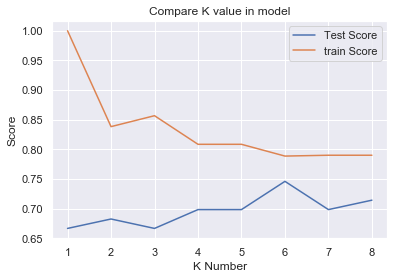

In [16]:
plt.title("Compare K value in model")
plt.plot(k_neighbors,test_score,label="Test Score")
plt.plot(k_neighbors,train_score,label="train Score")
plt.legend()
plt.xlabel("K Number")
plt.ylabel("Score")
plt.show()

In [19]:
#prediction 
knn=KNeighborsClassifier(n_neighbors=6)
#train
knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.746031746031746

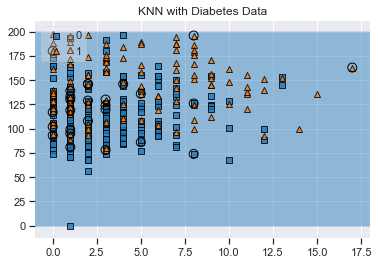

In [24]:
value = 20000
width = 20000
plot_decision_regions(x, y, clf=knn, legend=2, 
                      filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value},
                      filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width},
                      X_highlight=x_test)

# Adding axes annotations
#plt.xlabel('sepal length [cm]')
#plt.ylabel('petal length [cm]')
plt.title('KNN with Diabetes Data')
plt.show()

In [26]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,37,3,40
1,13,10,23
All,50,13,63


Text(0.5, 12.5, 'Predicted label')

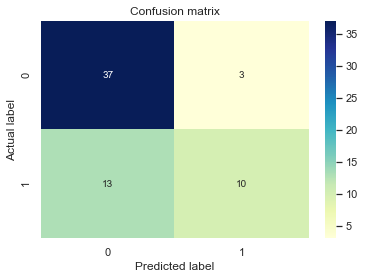

In [28]:
y_pred = knn.predict(x_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [29]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82        40
           1       0.77      0.43      0.56        23

    accuracy                           0.75        63
   macro avg       0.75      0.68      0.69        63
weighted avg       0.75      0.75      0.72        63



In [31]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

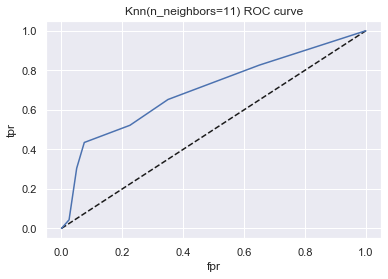

In [32]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [33]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7005434782608695

In [35]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7199558611323317
Best Parameters: {'n_neighbors': 28}
